## Toyota Car Prices Prediction

This notebook will explore the UK Car Prices Dataset, visualizing and exploring these data. My objective is to use Linear Regression to predict the Toyota Car Prices.

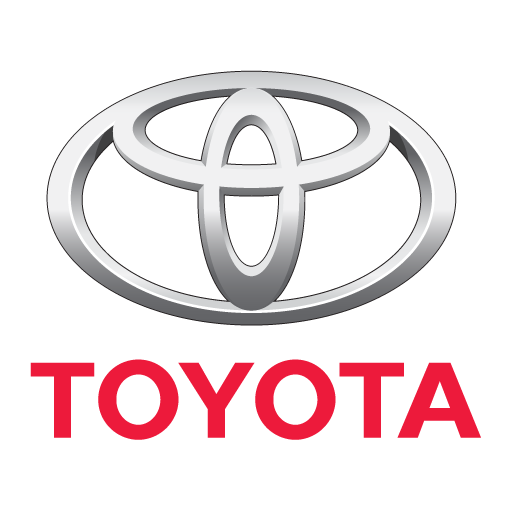

### Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Dataset

In [ ]:
df = pd.read_csv('../input/used-car-dataset-ford-and-mercedes/toyota.csv')

### Dataset Description

In [ ]:
df.head()

* model : Model of the car
* year : The year that car was made
* price : Price (Pounds)
* Transmission : Type of gear
* milage : How many miles the car went (1 mile = 1,609344 km)
* fuelType : Fuel type
* tax : tax
* mpg : Miles per gallon (1 galon = 3,78541178 liters)
* engine size : Size of engine (liters)

In [ ]:
df.info()

In [ ]:
sns.heatmap(df.isnull())

None null values

In [ ]:
df.describe()

### Data Visualization

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

#### Number of Cars per Model

In [ ]:
models = df.groupby('model').count()[['tax']].sort_values(by='tax',ascending=True).reset_index()
models = models.rename(columns={'tax':'numberOfCars'})

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['numberOfCars'], color='royalblue')
plt.xticks(rotation=60)

#### Number of Cars per Year

In [ ]:
perYear = df.groupby('year').count()[['tax']].sort_values(by='tax',ascending=True).reset_index()
perYear = perYear.rename(columns={'tax':'numberOfCars'})

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=perYear['year'], y=perYear['numberOfCars'], color='royalblue')

#### Transmission Type

In [ ]:
transmission = df.groupby('transmission').count()[['tax']].sort_values(by='tax').reset_index()
transmission = transmission.rename(columns={'tax':'count'})

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=transmission['transmission'], y=transmission['count'], color='royalblue')

#### Fuel Type

In [ ]:
fuel = df.groupby('fuelType').count()[['tax']].sort_values(by='tax').reset_index()
fuel = fuel.rename(columns={'tax':'count'})

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=fuel['fuelType'], y=fuel['count'], color='royalblue')

#### Engine Size

In [ ]:
engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax').reset_index()
engine = engine.rename(columns={'tax':'count'})

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'], y=engine['count'], color='royalblue')

#### Mileage Distribuition

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(df['mileage'])

#### Price Distribuition

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(df['price'])

### Encoding Categorical Data

Using one-hot encoding to transform categorical data into binary values

#### One-Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
dfEncoded = df

In [ ]:
dfEncoded = pd.get_dummies(dfEncoded, columns=["model"], prefix=["Is_a"] )
dfEncoded = pd.get_dummies(dfEncoded, columns=["fuelType"], prefix=['Fuel_is'])
dfEncoded = pd.get_dummies(dfEncoded, columns=["transmission"], prefix=['Transmission_is'])

In [ ]:
dfEncoded.info()

### Feature Selection

In [ ]:
features = dfEncoded.corr()
targetFeature = abs(features["price"])
relevant_features = targetFeature[targetFeature>0.075]

In [ ]:
dfSelected = dfEncoded[relevant_features.index]

In [ ]:
dfSelected

### Normalizing the Data

In [ ]:
data = dfSelected.drop(columns=['price'])
target = dfSelected['price']

In [ ]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(data)
scaledData = pd.DataFrame(x, columns=data.columns)
scaledData['price'] = target

### Train and Test Data Split

In [ ]:
x = scaledData.drop(columns=['price'])
y = scaledData['price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.35)

### Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

In [ ]:
score = lr.score(x_test,y_test)
print('R Square Score for Linear Regression : ', score)